## 1. Regularização

Antes de executar os experimentos, os códigos iniciais tem que ser executados, porque são usados nos experimentos posteriores.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
import time
from time import gmtime, strftime
import datetime
import os
import pytz
from mlxtend.plotting import plot_decision_regions

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%a, %d %b %Y %H:%M:%S")))
    print('Duration: {:.2f} seconds'.format(time.time() - self.begins))    

### 1.1 Analisando regularização usando L1 e L2

Inicialmente, para podermos comparar o efeito causado pela regularização, temos 
o o treinamento do modelo não regularizado.

Para esse modelo existe um overffiting. A primeira camada está sendo definida com 500 neurônios, um número bem maior do que o necessário para a complexidade do problema. Isso faz com que seja muito fácil que o overfitting aconteça.

Training: begins at Fri, 14 Oct 2022 15:15:02
Training: ends at Fri, 14 Oct 2022 15:17:40
Duration: 157.80 seconds
Train: 1.000, Test: 0.914


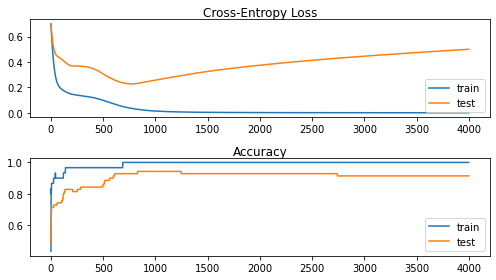

In [ ]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y), 
                    epochs=4000, verbose=0,batch_size=32,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Podemos ver que existe overfitting pelo modelo ao observarmos que, após certo ponto, a função custo começa aumentar para o dataset de testes. Da mesma forma, a acurácia para o dataset de testes cai levemente conforme após atingir apróximadamente 1000 epochs.

### 1.1.1 Regularização L2

Training: begins at Fri, 14 Oct 2022 15:29:56
Training: ends at Fri, 14 Oct 2022 15:33:12
Duration: 196.35 seconds
Train: 1.000, Test: 0.943


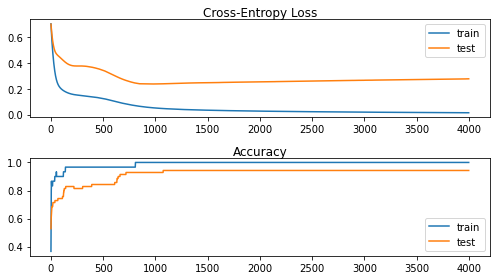

In [ ]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model_l2 = Sequential()
model_l2.add(Dense(500, input_dim=2, activation='relu',
                kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid'))
model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

# fit model
history_l2 = model_l2.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

# evaluate the model
_, train_acc = model_l2.evaluate(train_x, train_y, verbose=0)
_, test_acc = model_l2.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history_l2.history['loss'], label='train')
plt.plot(history_l2.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history_l2.history['accuracy'], label='train')
plt.plot(history_l2.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Podemos notar que, usando a regularização L2, diminuiu muito o aumento do custo no dataset de testes. Da mesma forma, no exemplo sem regularização, após 1000 epochs a acurácia começou a cair para o dataset de teste. Já usando a regularização L2 a acurácia se manteve estável.

Podemos notar também que após o fim do treinamento, o modelo não regularizado obteve a acurácia de teste de 0.914, enquanto que após a regularização essa acurácia subiu para 0.943.

### 1.1.2 Regularização L1

Training: begins at Fri, 14 Oct 2022 15:45:14
Training: ends at Fri, 14 Oct 2022 15:47:57
Duration: 162.70 seconds
Train: 1.000, Test: 0.929


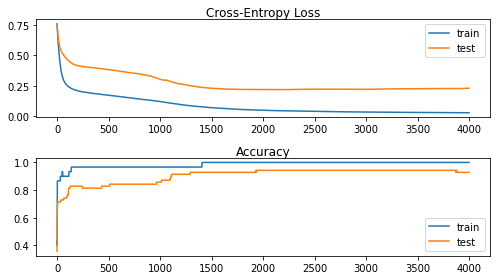

In [ ]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model_l1 = Sequential()
model_l1.add(Dense(500, input_dim=2, activation='relu',
                kernel_regularizer=l1(0.001)))
model_l1.add(Dense(1, activation='sigmoid'))
model_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

# fit model
history_l1 = model_l1.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

# evaluate the model
_, train_acc = model_l1.evaluate(train_x, train_y, verbose=0)
_, test_acc = model_l1.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history_l1.history['loss'], label='train')
plt.plot(history_l1.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history_l1.history['accuracy'], label='train')
plt.plot(history_l1.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Para o L1 tivemos um padrão bem diferente, mas a acurácia final foi um pouco inferior do que a atingida usando o L2 (0.943 vs 0.929)

### 1.1.3 Combinando L1 e L2

Training: begins at Fri, 14 Oct 2022 15:55:35
Training: ends at Fri, 14 Oct 2022 15:57:56
Duration: 140.71 seconds
Train: 1.000, Test: 0.943


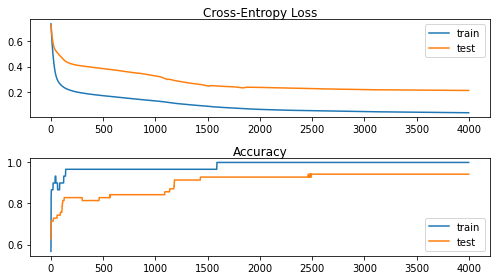

In [ ]:
# mlp with weight regularization for the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1_l2
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu',
                kernel_regularizer=l1_l2(0.001, 0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Combinando a regularização L1 e L2, se olharmos somente para a acurácia poderíamos afirmar que não houve diferença em relação a regularização L1 (ambos com acurácia de 0.943). Mas se compararmos visualmente os gráficos a função de custo em ambos, vemos que usando somente a regularização L1 o custo começa a aumentar levemente após 1500 epochs, enquanto que fica relativamente estável usando L1 e L2 combinados. Porém isso acontece um pouco mais afrente no treinamento.

Apesar de não se poder afirmar de maneira definitiva, houve uma aparente vantagem da combinação dos regularizadores em relação a qualquer um individualmente nesse modelo.

### 1.2 Weights Constraints

Existem algumas opções de limitações (constraints) que se podem utilizar no pesos para diminuir o problema de overfitting. Vamos testar usar MaxNorm, MinMaxNorm, NonNeg, UnitNorm e RadialConstraint.

Para efeito de comparação da média dos pesos da rede, primeiramente vamos rodar o modelo sem especificar limites de peso.

Average weight:  0.03807806937095369


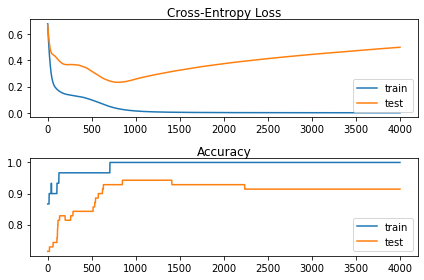

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

weight_list = []

def calc_average_weight(weights):
  weight_list.extend(weights[0])
  weight_list.extend(weights[1])
 
def print_avg_weights():
  a1 = sum(weight_list) / len(weight_list)
  average = sum(a1) / len(a1)
  print("Average weight: ", average)

# monitor the weights
weight_callback = LambdaCallback(on_epoch_end=lambda batch, logs: calc_average_weight(model.layers[0].get_weights()))

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[weight_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print_avg_weights()

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.2.1 MaxNorm

Train: 1.000, Test: 0.914
Average weight:  0.03184648174100474


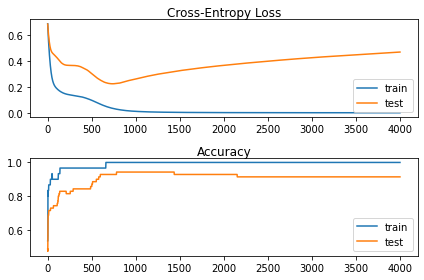

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

weight_list = []

def calc_average_weight(weights):
  weight_list.extend(weights[0])
  weight_list.extend(weights[1])
 
def print_avg_weights():
  a1 = sum(weight_list) / len(weight_list)
  average = sum(a1) / len(a1)
  print("Average weight: ", average)

# monitor the weights
weight_callback = LambdaCallback(on_epoch_end=lambda batch, logs: calc_average_weight(model.layers[0].get_weights()))

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=max_norm(1.0)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[weight_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

print_avg_weights()

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.2.2 MinMaxNorm

Train: 1.000, Test: 0.943
Average weight:  0.00479224834597158


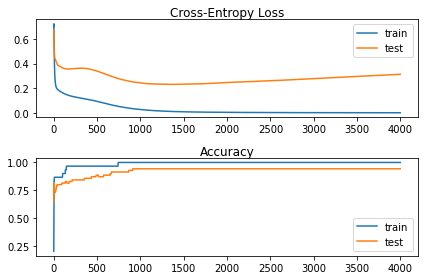

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import min_max_norm
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

weight_list = []

def calc_average_weight(weights):
  weight_list.extend(weights[0])
  weight_list.extend(weights[1])
 
def print_avg_weights():
  a1 = sum(weight_list) / len(weight_list)
  average = sum(a1) / len(a1)
  print("Average weight: ", average)

# monitor the weights
weight_callback = LambdaCallback(on_epoch_end=lambda batch, logs: calc_average_weight(model.layers[0].get_weights()))

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=1, max_value=1.0)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[weight_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

print_avg_weights()

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.2.3 NonNeg

Train: 1.000, Test: 0.929
Average weight:  0.07833302770169312


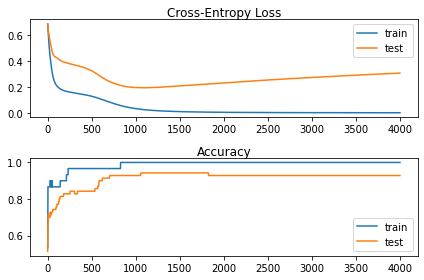

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import non_neg
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

weight_list = []

def calc_average_weight(weights):
  weight_list.extend(weights[0])
  weight_list.extend(weights[1])
 
def print_avg_weights():
  a1 = sum(weight_list) / len(weight_list)
  average = sum(a1) / len(a1)
  print("Average weight: ", average)

# monitor the weights
weight_callback = LambdaCallback(on_epoch_end=lambda batch, logs: calc_average_weight(model.layers[0].get_weights()))

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=non_neg()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[weight_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

print_avg_weights()

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.2.4 UnitForm

Train: 1.000, Test: 0.943
Average weight:  0.006035972264749595


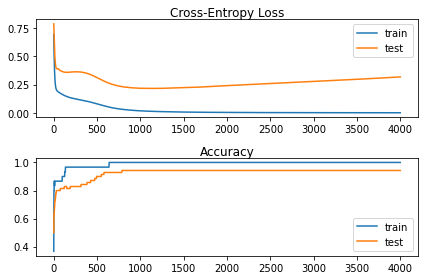

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import unit_norm
from keras.callbacks import LambdaCallback
from keras.callbacks import LambdaCallback
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

weight_list = []

def calc_average_weight(weights):
  weight_list.extend(weights[0])
  weight_list.extend(weights[1])
 
def print_avg_weights():
  a1 = sum(weight_list) / len(weight_list)
  average = sum(a1) / len(a1)
  print("Average weight: ", average)

# monitor the weights
weight_callback = LambdaCallback(on_epoch_end=lambda batch, logs: calc_average_weight(model.layers[0].get_weights()))

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0, callbacks=[weight_callback])

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

print_avg_weights()

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.2.5 RadialConstraint

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import radial_constraint
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=radial_constraint()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

Se compararmos as acurácias atingidas após a normalização usando limitações de peso, podemos ver que os modelos que obtiveram as melhores performances foram o MinMax juntamente com o UnitForm. Mas se olharmos para o gráfico do custo vemos que o do MinMax teve uma subida bem menos acentuada para o dataset de testes do que o utilizando o UnitForm. Isso indica que houve uma melhor generalização para o MinMax, comparada com usando UnitForm.

Podemos notar que a execução com o maior média de pesos foi a que não foi colocado limite. Porém podemos ver que quase não houve diferença quando compararmos com MaxNorm. Isso fica evidenciado quando comparamos com os gráficos gerados, que não tiveram mudança perceptível.

Apesar de não ter feito uma compilação de todos valores, podemos notar que ao olhar para a média de pesos e para os gráficos em cada modelo, que quanto menor a média menos overffiting o modelo todo, quando olhamos para os gráficos.

## 1.3 Usando Dropout

Para experimentar com o dropout foi usado um modelo com 40% de chance de dropout e utilizando weight contraints (MinMax). Para esse caso, temos o resultado da execução abaixo.

Training: begins at Fri, 14 Oct 2022 18:06:43
Training: ends at Fri, 14 Oct 2022 18:09:13
Duration: 149.77 seconds
Train: 1.000, Test: 0.943


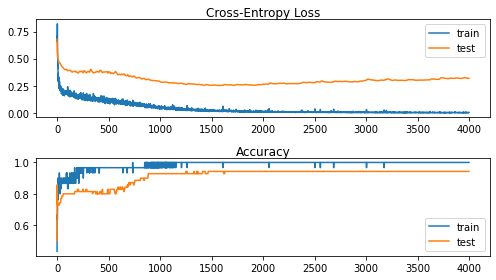

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import min_max_norm
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model_dropout = Sequential()
model_dropout.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=1.0, max_value=1.0)))
model_dropout.add(Dropout(0.4))
model_dropout.add(Dense(1, activation='sigmoid'))
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

# fit model
history_dropout = model_dropout.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

# evaluate the model
_, train_acc = model_dropout.evaluate(train_x, train_y, verbose=0)
_, test_acc = model_dropout.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history_dropout.history['loss'], label='train')
plt.plot(history_dropout.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history_dropout.history['accuracy'], label='train')
plt.plot(history_dropout.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.3.1 Comparando probabilidades de dropout (dropout rate)

Em seguida o experimento foi repetido utilizando 9 valores diferentes para a probabilidade de dropout (Grid search).

Training: begins at Sat, 15 Oct 2022 09:29:53
Training: ends at Sat, 15 Oct 2022 09:32:21
Duration: 147.47 seconds
Train: 1.000, Test: 0.943


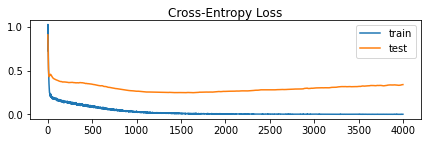

Training: begins at Sat, 15 Oct 2022 09:32:21
Training: ends at Sat, 15 Oct 2022 09:34:50
Duration: 148.49 seconds
Train: 1.000, Test: 0.943


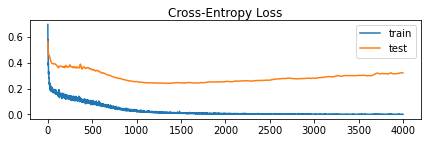

Training: begins at Sat, 15 Oct 2022 09:35:44
Training: ends at Sat, 15 Oct 2022 09:38:08
Duration: 143.74 seconds
Train: 1.000, Test: 0.943


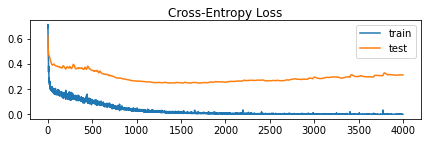

Training: begins at Sat, 15 Oct 2022 09:39:07
Training: ends at Sat, 15 Oct 2022 09:41:28
Duration: 141.52 seconds
Train: 1.000, Test: 0.943


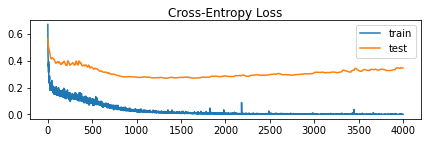

Training: begins at Sat, 15 Oct 2022 09:41:29
Training: ends at Sat, 15 Oct 2022 09:43:48
Duration: 138.65 seconds
Train: 1.000, Test: 0.943


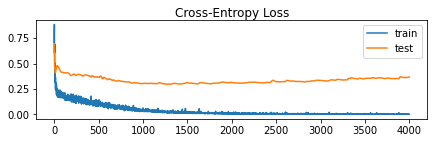

Training: begins at Sat, 15 Oct 2022 09:43:48
Training: ends at Sat, 15 Oct 2022 09:46:11
Duration: 142.87 seconds
Train: 1.000, Test: 0.943


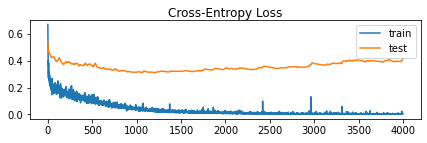

Training: begins at Sat, 15 Oct 2022 09:47:11
Training: ends at Sat, 15 Oct 2022 09:49:29
Duration: 138.00 seconds
Train: 1.000, Test: 0.914


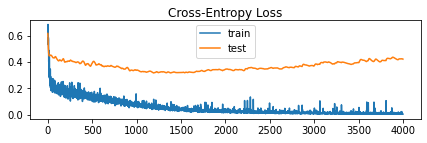

Training: begins at Sat, 15 Oct 2022 09:49:29
Training: ends at Sat, 15 Oct 2022 09:51:51
Duration: 141.35 seconds
Train: 1.000, Test: 0.886


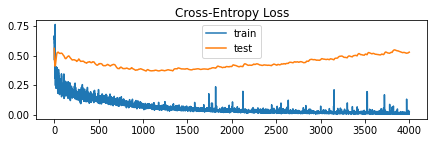

Training: begins at Sat, 15 Oct 2022 09:51:51
Training: ends at Sat, 15 Oct 2022 09:54:15
Duration: 143.43 seconds
Train: 1.000, Test: 0.886


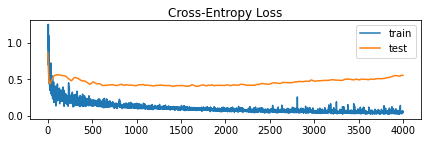

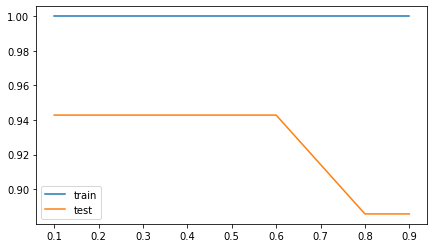

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import min_max_norm
import matplotlib.pyplot as plt
import pandas as pd

dropout_options = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

def get_model(dropout_rate):

    # define model
    model_dropout = Sequential()
    model_dropout.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=min_max_norm(min_value=1.0, max_value=1.0)))
    model_dropout.add(Dropout(dropout_rate))
    model_dropout.add(Dense(1, activation='sigmoid'))
    model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model_dropout

# callbacks tensorboard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=100)

#create dataframe to store the acuracy for each dropout rate for test and train
df = pd.DataFrame(columns=['dropout_rate', 'train_acc', 'test_acc'])

# generate 2d classification dataset
x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]


for dropout_rate in dropout_options:

    model_dropout = get_model(dropout_rate)

    history_dropout = model_dropout.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0,
                    callbacks=[MyCustomCallback(),tensorboard_callback])

    # evaluate the model
    _, train_acc = model_dropout.evaluate(train_x, train_y, verbose=0)
    _, test_acc = model_dropout.evaluate(test_x, test_y, verbose=0)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    plt.subplot(211)
    plt.title('Cross-Entropy Loss', pad=-40)
    plt.plot(history_dropout.history['loss'], label='train')
    plt.plot(history_dropout.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    #store the accuracy for each dropout rate
    df = df.append({'dropout_rate': dropout_rate, 'train_acc': train_acc, 'test_acc': test_acc}, ignore_index=True)


#plot the accuracy for each dropout rate
plt.plot(df['dropout_rate'], df['train_acc'], label='train')
plt.plot(df['dropout_rate'], df['test_acc'], label='test')
plt.legend()
plt.show()

Podemos notar que até 60% de chance de dropout o modelo se comportou de forma semelhante. Porém, ao aumentar essa probabilidade a acurácia de testes começou a cair.

Isso acontece porque a cada iteração, como ocorre o dropout, a rede neural após o dropout é uma rede neural menor do que a original, ou seja, com menos neurônios. Com uma taxa de dropout muito alta, acaba que a rede treinada tem uma capacidade muito menor em número de neurônios, ocorrendo underfitting.

## 1.4 Noise Regularization

### 1.4.1 Ruído na camada de entrada

Train: 0.967, Test: 0.771


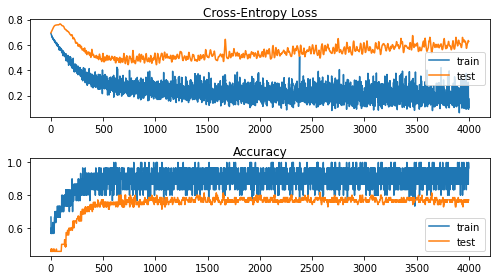

In [ ]:
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(GaussianNoise(.05, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

### 1.4.2 Ruído na camada de saída

Train: 1.000, Test: 0.786


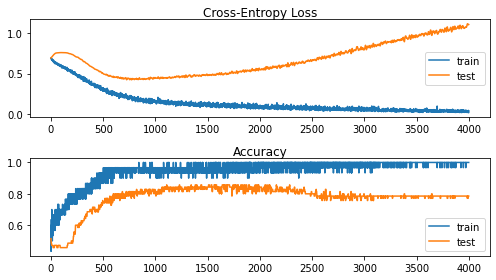

In [ ]:
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, activation='relu'))
model.add(GaussianNoise(.05, input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y),
                    epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

## 1.5 Early Stopping

**Sem early stopping**

Train: 0.002, Test: 0.005


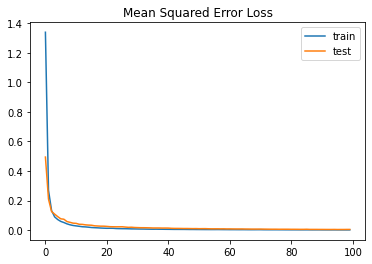

In [ ]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
train_y = train_y.reshape(len(train_y), 1)
test_y = test_y.reshape(len(train_y), 1)

# created scaler
scaler = StandardScaler()

# fit scaler on training dataset
scaler.fit(train_y)

# transform training dataset
train_y = scaler.transform(train_y)

# transform test dataset
test_y = scaler.transform(test_y)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, 
                activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Mean Squared Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.show()

**Com early stopping**

Train: 0.001, Test: 0.003


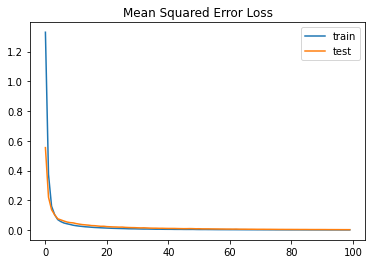

In [10]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
train_y = train_y.reshape(len(train_y), 1)
test_y = test_y.reshape(len(train_y), 1)

# early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# created scaler
scaler = StandardScaler()

# fit scaler on training dataset
scaler.fit(train_y)

# transform training dataset
train_y = scaler.transform(train_y)

# transform test dataset
test_y = scaler.transform(test_y)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, 
                activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=100, verbose=0, callbacks=[es])

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Mean Squared Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
plt.show()

## 1.6 Data Scaling

Primeiros podemos testar a regressão sem usar Data Scaling

Train: nan, Test: nan


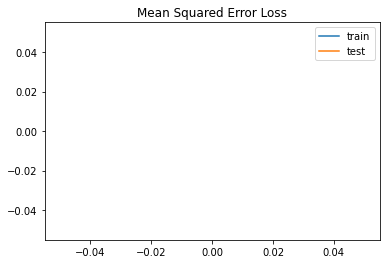

In [18]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
train_y = train_y.reshape(len(train_y), 1)
test_y = test_y.reshape(len(train_y), 1)

# define model
model = Sequential()
model.add(Dense(25, input_dim=20, 
                activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile model
model.compile(loss='mean_squared_error', 
              optimizer=SGD(learning_rate=0.01, momentum=0.9))

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y),
                    epochs=100, verbose=0)

# evaluate the model
train_mse = model.evaluate(train_x, train_y, verbose=0)
test_mse = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

# plot loss during training
plt.title('Mean Squared Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Ao não usar Data Scaling pode ocorrer erros como nessa execução. Por problemas como exploding gradients.

Podemos testar usando várias escalas diferentes como no exemplo abaixo.

Scale used:  (-1, 1)
Train: 0.004, Test: 0.011


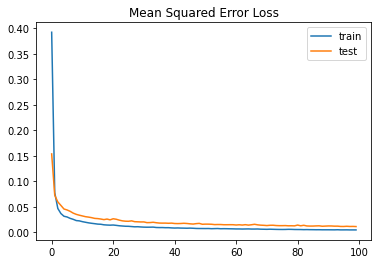

Scale used:  (-0.5, 0.5)
Train: 0.003, Test: 0.005


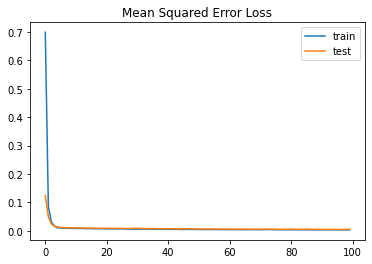

Scale used:  (-0.1, 0.1)
Train: 0.000, Test: 0.000


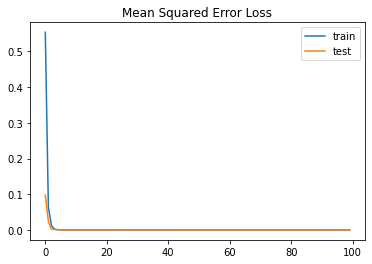

Scale used:  (0, 0.5)
Train: 0.001, Test: 0.002


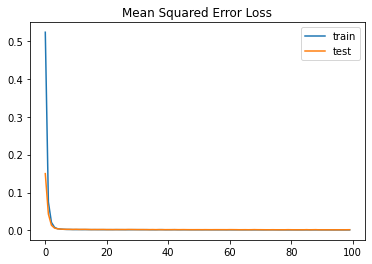

In [16]:
# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate regression dataset
x, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# reshape 1d arrays to 2d arrays
train_y = train_y.reshape(len(train_y), 1)
test_y = test_y.reshape(len(train_y), 1)

f_ranges = [(-1,1), (-0.5, 0.5),(-0.1, 0.1),(0, 0.5)]

for r in f_ranges:

  print("Scale used: ", r)

  # created scaler
  scaler = MinMaxScaler(feature_range=r)

  # fit scaler on training dataset
  scaler.fit(train_y)

  # transform training dataset
  train_y = scaler.transform(train_y)

  # transform test dataset
  test_y = scaler.transform(test_y)

  # define model
  model = Sequential()
  model.add(Dense(25, input_dim=20, 
                  activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='linear'))

  # compile model
  model.compile(loss='mean_squared_error', 
                optimizer=SGD(learning_rate=0.01, momentum=0.9))

  # fit model
  history = model.fit(train_x, train_y, 
                      validation_data=(test_x, test_y),
                      epochs=100, verbose=0)

  # evaluate the model
  train_mse = model.evaluate(train_x, train_y, verbose=0)
  test_mse = model.evaluate(test_x, test_y, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

  # plot loss during training
  plt.title('Mean Squared Error Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  plt.show()

Podemos ver que quando a escala é muito baixa, ocorre o mesmo com o valores do mean squared error, porque resulta em pesos e em gradientes menores.

## Vanishing Gradients

# 2. Busca de Hiperparâmetros